# Tutorial 1 Basics

Tutorial prerequisites:

 * Answer this question with pen and paper, without looking up any references:

>Write a program that prints the numbers from 1 to 100. But for multiples of 3, print “Fizz” instead of the number and for the multiples of 5, print “Buzz”. For numbers which are multiples of both 3 and 5 print “FizzBuzz”."
 
 * Python3 setup: how to start up a Jupyter notebook, install and load `baltic3` modules for use. Optionally, how to set a `PYTHONPATH`.
 * Required libraries: `pandas` (mostly) and `numpy` (rarely). 
 * Some prior experience with `matplotlib`, or `ggplot` from R. i.e. you've at least drawn a basic figure in command line before.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection, LineCollection
#import matplotlib.path as mpath
#import matplotlib.lines as mlines
#import seaborn as sns

import numpy as np
import pandas as pd
import os
#os.chdir("/users/dten0001/Google Drive/baltic3/examples")
import sys
from functools import reduce
import subprocess
import time
from Bio import Phylo

# Set random state
my_randomstate = np.random.RandomState(12345)

import xio
import my_utils as xu
import biophylo_utils as bpu
import baltic3 as bt
import baltic3_utils as btu


# Baltic Objects, and a simple Plot

(contented lifted from Gytis' original repo)

`baltic` uses three main classes - `node`, `leaf` and `tree` to import, manipulate and plot BEAST trees. (Usually, in graph theory, both leaves and internal nodes are technically nodes, but in baltic, `nodes` strictly refer to *internal* nodes, and leaves are the *external* nodes, or tips.) `Node` and `leaf` classes have references to the usual set of parameters you'd find in a phylogeny:

 * index of character in string designating the branch (a unique identifier within the tree)
 * `length`
 * `height`
 * position in time (`absoluteTime`), 
 * X and Y coordinates, where X is usually just `height`
 * a dictionary encoding BEAST branch comments (traits) 
 * a reference to their parent (`None` for root) and 
 * a string designating their type (`branchType`). 
 
The `node` class additionally has:
 * a `children` attribute, which is a list of the node’s children, 
 * a list called `leaves` that contains tip names that descend from that node, 
 * `numChildren` attribute, the length of the leaves list and 
 * a `childHeight` attribute which tracks when the last tip descending from the node existed.

The `leaf` class has two extra attributes called `name` and `numName`. The former is used much more than the latter.

## About the Data

The data is a `.nex` file called `H3_test_tree.nex`, an ML search tree made to look like a BEAST tree (see `examples/input_formatting.md`) for more details on how to do this. It has 600 tips. 

The `read()` function `austechia_read_tree()` is actually quite unwieldy, because I lifted a working version straight from Gytis' notebook of examples, `austechia.ipynb`, so it's basically a wrapper function for quite a few other functions. It works, but *only* on BEAST trees, and makes too many calls to other functions. 

In [2]:
# load tree. This will print out a bunch of stats as well
bt_tre = btu.austechia_read_tree("H3_test_tree.nex", date_delim="|")

Number of objects found in tree string: 1199

Tree height: 0.026984
Tree length: 1.004646
strictly bifurcating tree

Numbers of objects in tree: 1199 (599 nodes and 600 leaves)

Highest tip date: 2017.0082


### Leaf objects

Each leaf object has a name, and (x, y) coordinates - the coordinates are the `height` and `y` attributes of the `leaf` class. We'll be using these to plot exactly where they're supposed to be.

Node objects have (`height`, `y`) coordinates as well, but don't have names, which actually makes referencing pretty difficult. For the purposes of just drawing a tree, it's fine.

To demonstrate the two most oft-used class methods:

In [3]:
# Read the tipnames of the tree into a list
leaves_ls = bt_tre.leaves

my_leaf = leaves_ls[0]
print("leaf name = %s " % my_leaf.name)
print("leaf coordinates = (%s, %s)" % (my_leaf.height, my_leaf.y))

# Read all node and leaf objects of the tree into a list
obj_ls = bt_tre.Objects

leaf name = H3N2|A/Victoria/660/2016|70961-HA|H3|VIC/Cranbourne|2016-10-26 
leaf coordinates = (0.02019599999999994, 599)


All nodes and leaves have (x, y) coordinates. We'll draw the tips as red circles, then connect the nodes and tips with black lines. The code structure is as follows: we iterate over all `Objects` in the tree. If the object encountered is `leaf`, draw it as a tip, including a tip shape (using `ax.scatter()`). Elif it's a `node`, draw it as a node. 

In [4]:
branch_width=1
tipsize=20
tip_colour="red"

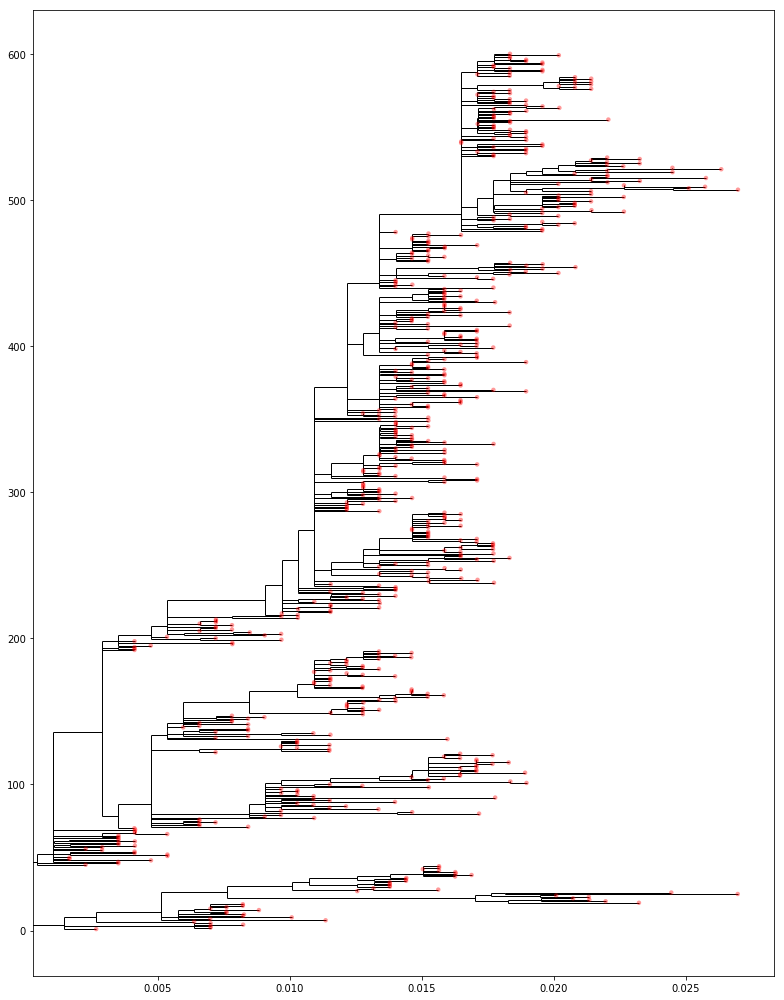

In [5]:
patches_ls = []
lines_ls = []

fig,ax = plt.subplots(figsize=(11,14),facecolor='w')

for k in bt_tre.Objects:
    c = 'k'
    x=k.height # (x, y) coords
    y=k.y

    xp = k.parent.height
    if x is None: # matplotlib won't plot Nones, like root
        x = 0
    if xp==None:
        xp = x

    if isinstance(k,bt.leaf) or k.branchType=='leaf':
        ax.scatter(x,y,s=tipsize,facecolor="red",edgecolor='none',zorder=11, alpha=0.4)

    elif isinstance(k,bt.node) or k.branchType=='node':
        line = np.array([[x, k.children[0].y], [x, k.children[-1].y]])
        lines_ls.append(line)

    line = np.array([[xp, y], [x, y]])
    lines_ls.append(line)

line_collection = LineCollection(lines_ls, lw=branch_width,color='k', zorder=10)
ax.add_collection(line_collection)

plt.tight_layout()
plt.show()